# Vehicle Recalls

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Path to recalls dataset

In [2]:
recalls_dataset = '../Processed_Data/API/Recalls.pkl'

## Load recalls Data

In [193]:
df_recalls = pd.read_pickle(recalls_dataset)
print(df_recalls.shape)
df_recalls.head()

(63599, 6)


,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate
0,POWER TRAIN:AXLE ASSEMBLY:AXLE SHAFT,VOLVO,VOLVO OF AMERICA CORP.,245,1978,1978
1,SEAT BELTS:FRONT:ANCHORAGE,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2004
2,ENGINE AND ENGINE COOLING:ENGINE:DIESEL,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2006
3,"FUEL SYSTEM, OTHER:DELIVERY:HOSES, LINES/PIPIN...",WESTERN,"WESTERN RV, INC.",ALPENLITE,1989,1992
4,STRUCTURE:BODY:DOOR,PREVOST,"PREVOST CAR, INCORPORATED",LE MIRAGE 96,1979,1995


## Detect the new energy data

In [194]:
NEV_Symbol = ['HYBRID','ELEC','HEV ','HV ','EV ',' HEV',' HV',' EV','ENERGI','ECO','PLUG-IN','TESLA','PLUGIN']
pattern = '|'.join(NEV_Symbol)

# Determine whether New Energy vehicle or Traditional vehicle, add new column called fuel_type.
df_recalls['fuel_type'] = df_recalls.Model.str.contains(pattern)
mapping = {False: 'Traditional', True:'New energy'}
df_recalls.replace( {'fuel_type': mapping}, inplace=True )
df_recalls.head()

,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate,fuel_type
0,POWER TRAIN:AXLE ASSEMBLY:AXLE SHAFT,VOLVO,VOLVO OF AMERICA CORP.,245,1978,1978,Traditional
1,SEAT BELTS:FRONT:ANCHORAGE,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2004,Traditional
2,ENGINE AND ENGINE COOLING:ENGINE:DIESEL,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2006,Traditional
3,"FUEL SYSTEM, OTHER:DELIVERY:HOSES, LINES/PIPIN...",WESTERN,"WESTERN RV, INC.",ALPENLITE,1989,1992,Traditional
4,STRUCTURE:BODY:DOOR,PREVOST,"PREVOST CAR, INCORPORATED",LE MIRAGE 96,1979,1995,Traditional


In [195]:
df_recalls.groupby('fuel_type').size()

fuel_type
New energy       395
Traditional    63204
dtype: int64

# Components
## Count The Frequency For Each Components

**Each recall may have mulitiple components at same time, we need split them by comma.**

In [196]:
def split_components(series,delimiter):
 return pd.Series([x for list_ in series for x in list_.split(delimiter)])
split_components(df_recalls['Component'],',')
split_components(df_recalls['Component'],':')

0                       POWER TRAIN
1                     AXLE ASSEMBLY
2                        AXLE SHAFT
3                        SEAT BELTS
4                             FRONT
                    ...            
145107                     AIR BAGS
145108                      FRONTAL
145109    ENGINE AND ENGINE COOLING
145110               COOLING SYSTEM
145111                        TIRES
Length: 145112, dtype: object

**Now we can count the frequency.**

In [197]:
df_recalls['Component'] = split_components(df_recalls['Component'],',')
valueCount = split_components(df_recalls['Component'],':')\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount

EQUIPMENT                                 6954
SERVICE BRAKES                            5653
FUEL SYSTEM                               4400
STEERING                                  3609
ELECTRICAL SYSTEM                         3490
                                          ... 
CUSHION                                      1
FILLING/CHARGING                             1
REAR WINDOW WIPER/WASHER                     1
 Lower Anchor (on car seat or vehicle)       1
 CABLES                                      1
Length: 449, dtype: int64

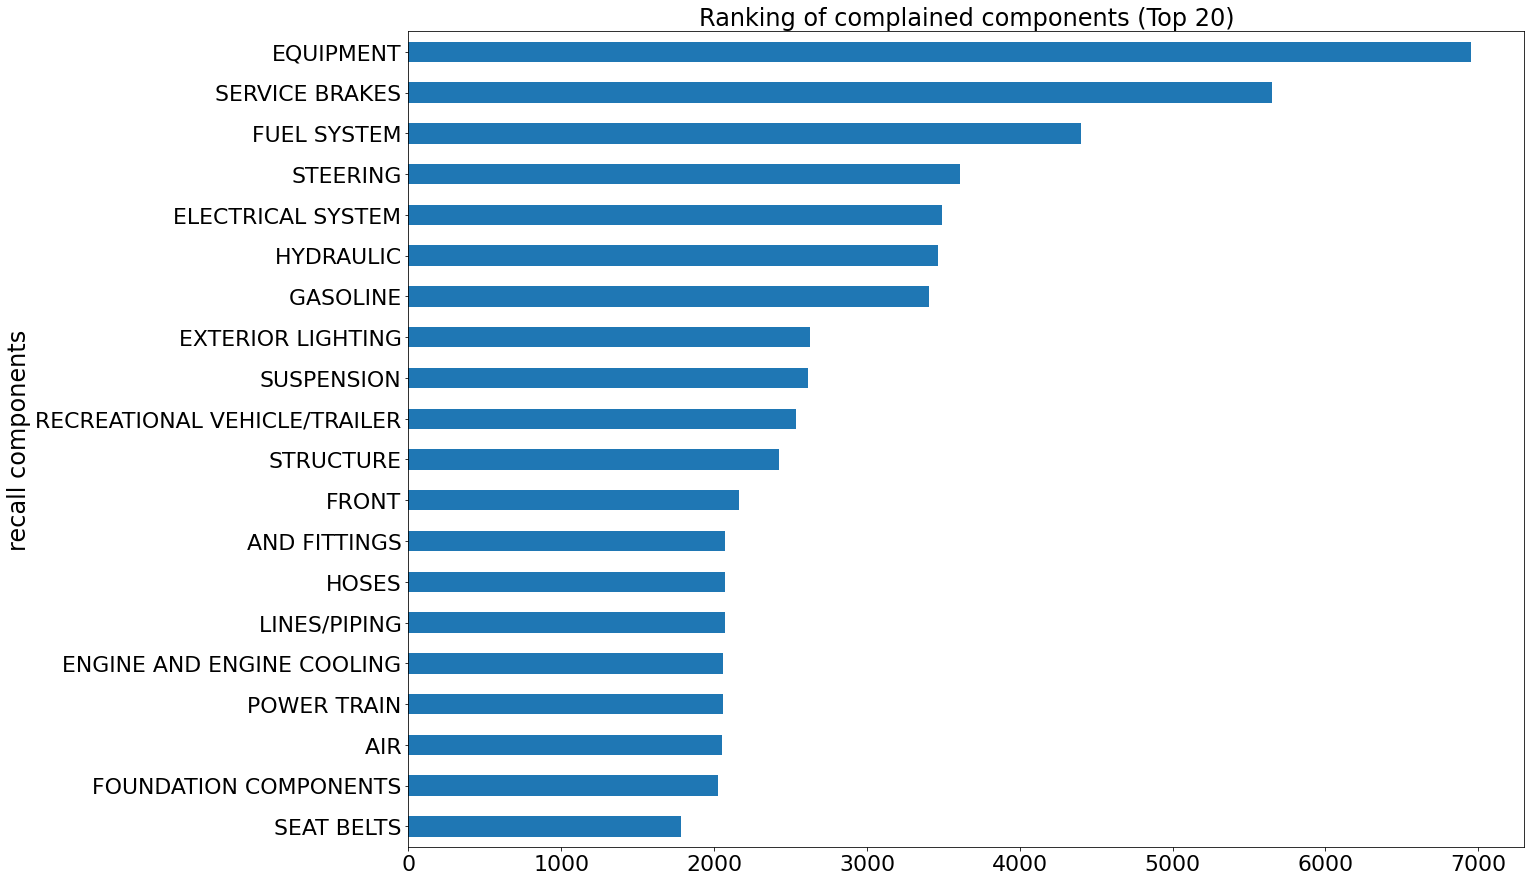

In [198]:
fig = plt.figure(figsize=(20,15))
# set up the bar chart
ax = valueCount.head(20).plot(kind="barh")
plt.title("Ranking of complained components (Top 20)", fontsize=24)
plt.ylabel("recall components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Recall_components_top20.png', format='png')

## The correlation between these components
The number of times they were recalled at the same time

Get the boolean value of all components for each recall

In [199]:
def df_bool_with_item(list_items, unique_items):
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = list_items.apply(lambda x: item in x)
            
    return pd.DataFrame(bool_dict)

components_bool = df_bool_with_item(df_recalls['Component'], valueCount.keys())
components_bool.head()

,EQUIPMENT,SERVICE BRAKES,FUEL SYSTEM,STEERING,ELECTRICAL SYSTEM,HYDRAULIC,GASOLINE,EXTERIOR LIGHTING,SUSPENSION,RECREATIONAL VEHICLE/TRAILER,...,MACPHERSON STRUT,ACCESORY POWER OUTLET/JACK/PORT/USB/SAE/CIGARETTE LIGHTER,CONNECTORS/PLUGS,HOSES AND FITTINGS,PASSENGER SIDE FRONTAL,CUSHION,FILLING/CHARGING,REAR WINDOW WIPER/WASHER,Lower Anchor (on car seat or vehicle),CABLES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [200]:
components_corr = components_bool.corr(method = "pearson")
components_corr.head()

,EQUIPMENT,SERVICE BRAKES,FUEL SYSTEM,STEERING,ELECTRICAL SYSTEM,HYDRAULIC,GASOLINE,EXTERIOR LIGHTING,SUSPENSION,RECREATIONAL VEHICLE/TRAILER,...,MACPHERSON STRUT,ACCESORY POWER OUTLET/JACK/PORT/USB/SAE/CIGARETTE LIGHTER,CONNECTORS/PLUGS,HOSES AND FITTINGS,PASSENGER SIDE FRONTAL,CUSHION,FILLING/CHARGING,REAR WINDOW WIPER/WASHER,Lower Anchor (on car seat or vehicle),CABLES
EQUIPMENT,1.000000,-0.117247,-0.102339,-0.092126,-0.089472,-0.090108,-0.089294,-0.077965,-0.077670,0.542778,...,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489,-0.001489
SERVICE BRAKES,-0.117247,1.000000,-0.085152,-0.076654,-0.075318,-0.074975,-0.074298,-0.064871,-0.064626,-0.063639,...,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239
FUEL SYSTEM,-0.102339,-0.085152,1.000000,-0.066908,-0.065742,-0.065443,-0.064851,-0.056623,-0.056409,-0.055548,...,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081
STEERING,-0.092126,-0.076654,-0.066908,1.000000,-0.059181,-0.058912,-0.058379,-0.050972,-0.050780,-0.050004,...,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973,-0.000973
ELECTRICAL SYSTEM,-0.089472,-0.075318,-0.065742,-0.059181,1.000000,-0.057885,-0.057362,-0.050084,-0.049895,-0.047369,...,-0.000956,0.016444,0.016444,-0.000956,-0.000956,-0.000956,-0.000956,-0.000956,-0.000956,0.016444


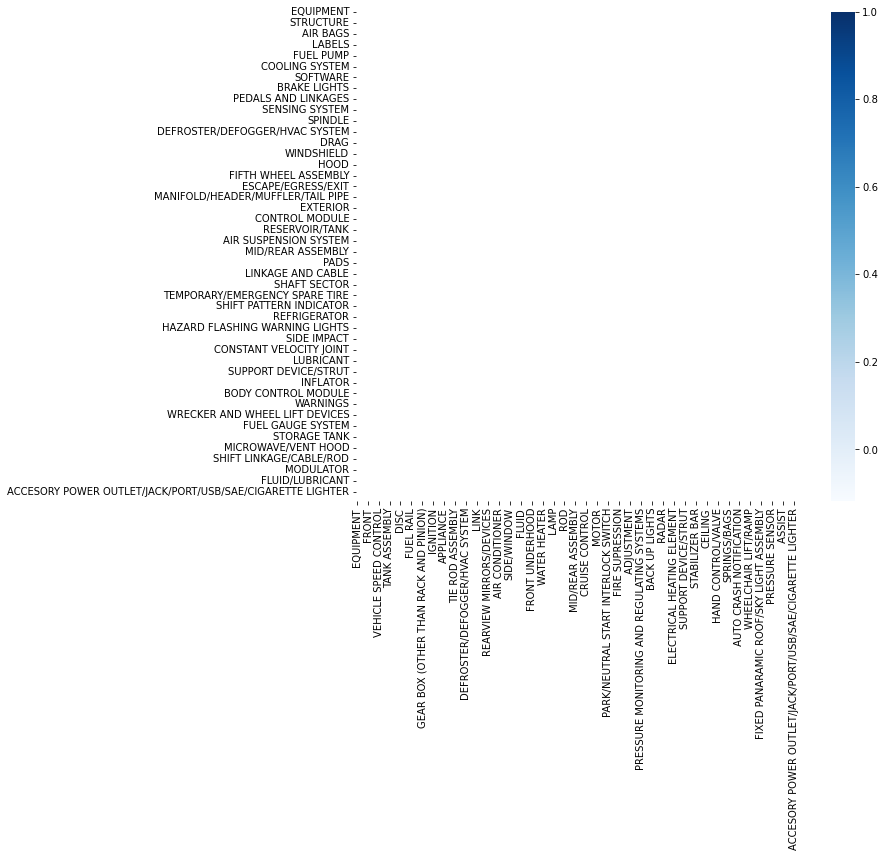

In [201]:
fig, ax = plt.subplots(figsize = (10,9))
sns.heatmap(components_corr,fmt="",cmap="Blues",linewidths=.1, ax=ax)
# Save as png image
fig.savefig('./Outputs/Recalls_components_corr.png', format='png')

# Date between Recall and vehicle released
## Calculate the time differences

In [202]:
df_recalls['ReportReceivedDate'] = pd.to_numeric(df_recalls['ReportReceivedDate'], errors='ignore')
df_recalls['ModelYear'] = pd.to_numeric(df_recalls['ModelYear'], errors='ignore')
df_recalls['YearDelta'] = df_recalls['ReportReceivedDate'] - df_recalls['ModelYear']
df_recalls.head()

,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate,fuel_type,YearDelta
0,POWER TRAIN:AXLE ASSEMBLY:AXLE SHAFT,VOLVO,VOLVO OF AMERICA CORP.,245,1978,1978,Traditional,0
1,SEAT BELTS:FRONT:ANCHORAGE,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2004,Traditional,0
2,ENGINE AND ENGINE COOLING:ENGINE:DIESEL,MONACO COACH,MONACO COACH CORPORATION,SIGNATURE,2004,2006,Traditional,2
3,FUEL SYSTEM,WESTERN,"WESTERN RV, INC.",ALPENLITE,1989,1992,Traditional,3
4,OTHER:DELIVERY:HOSES,PREVOST,"PREVOST CAR, INCORPORATED",LE MIRAGE 96,1979,1995,Traditional,16


## Draw the average year difference between these makers

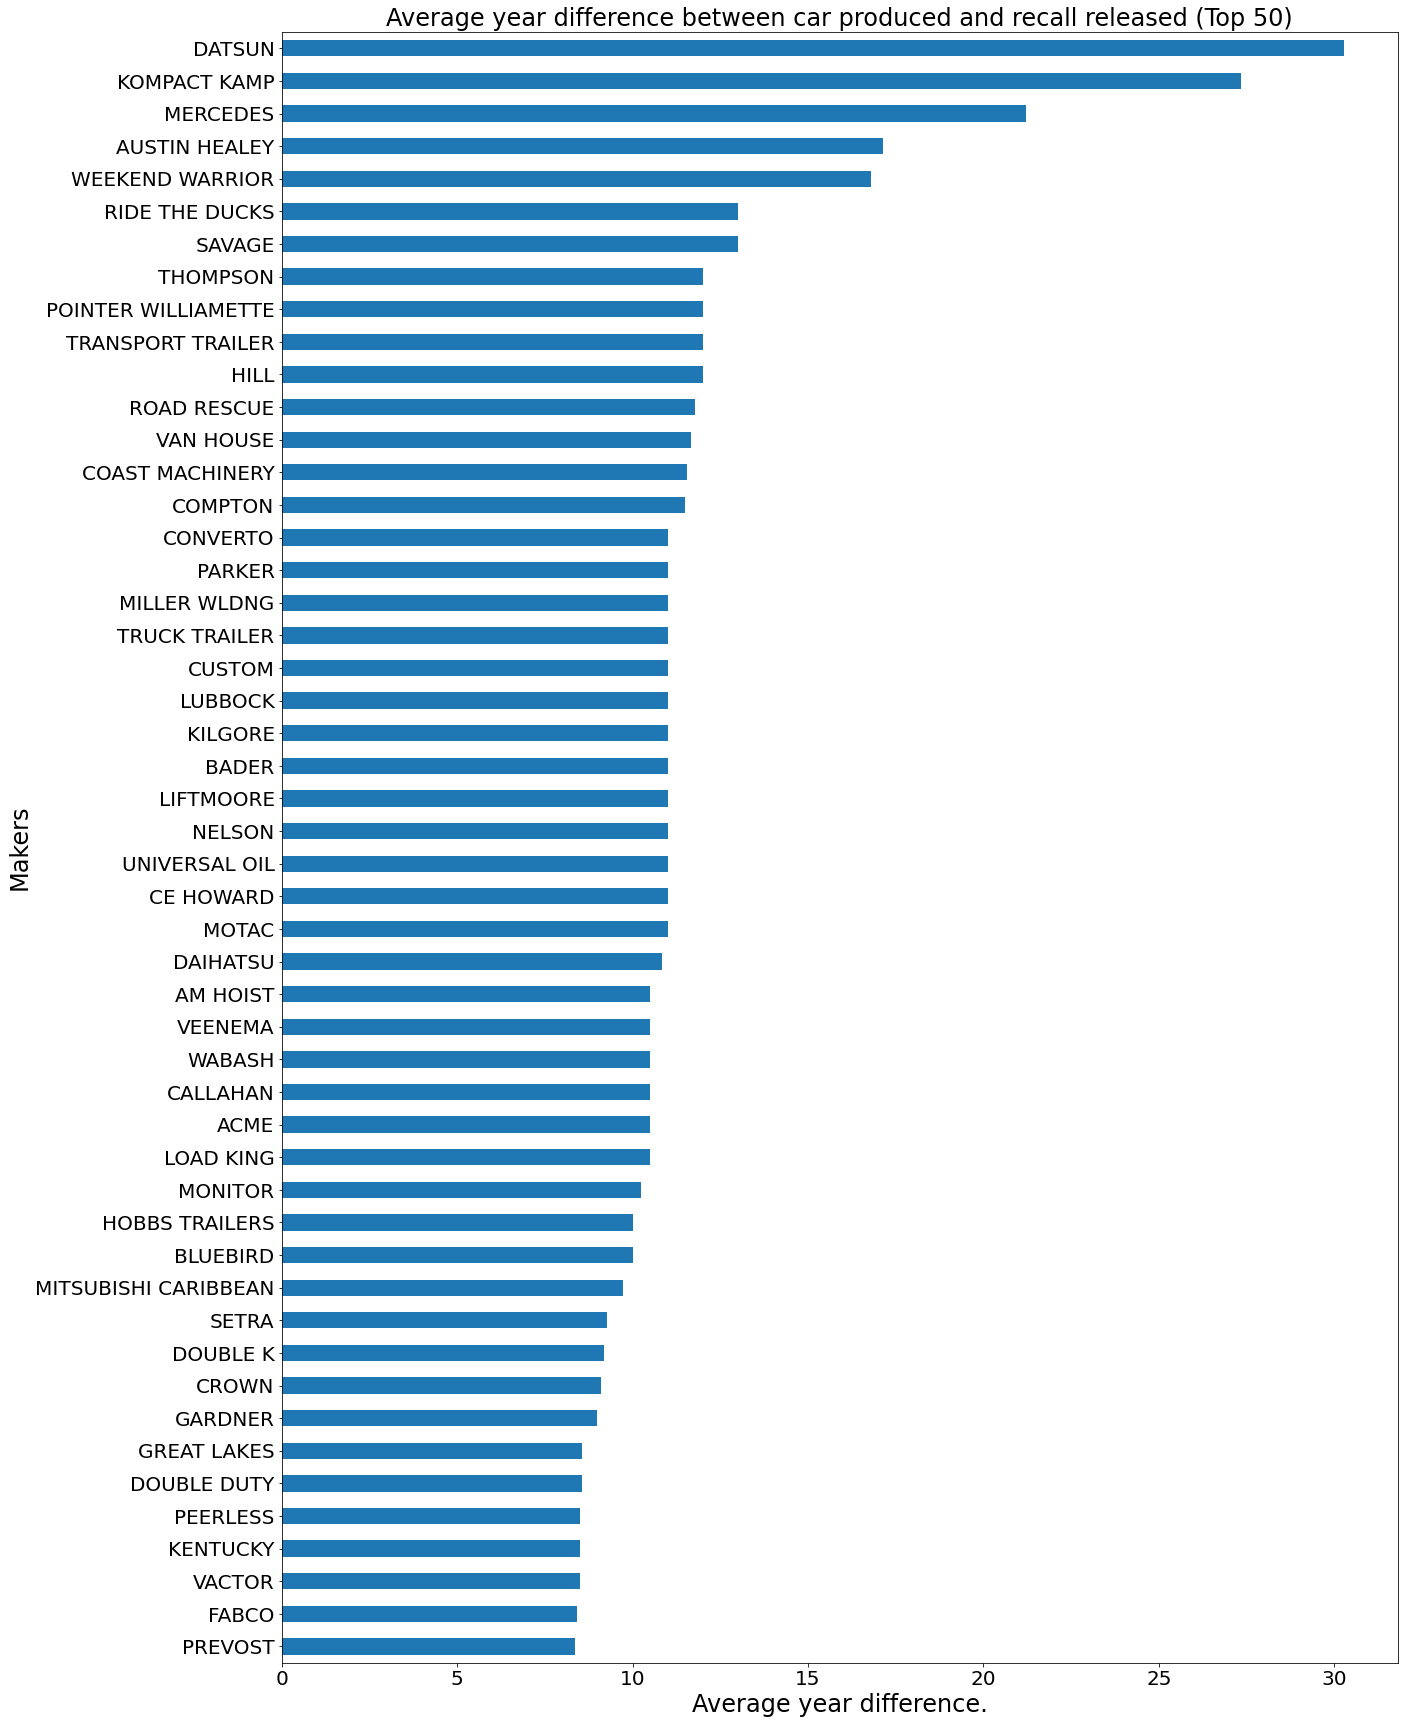

In [203]:
fig = plt.figure(figsize=(20,30))
# set up the bar chart
ax = df_recalls.groupby('Make')['YearDelta'].mean().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title("Average year difference between car produced and recall released (Top 50)", fontsize=24)
plt.xlabel("Average year difference.", fontsize=24)
plt.ylabel("Makers", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Recall_year_differences_top50.png', format='png')

In [204]:
df_recalls[df_recalls['Make']=='MERCEDES'].groupby('Model')['YearDelta'].count()

Model
E CLASS    4
S CLASS    1
Name: YearDelta, dtype: int64

# Recalls Ratio 
**\*Recall per model of each maker\***
## Recalls Ratio X Maker

### Number of model for each maker

In [205]:
model_num_of_makes_NEV = df_recalls[df_recalls['fuel_type']=='New energy'][['Make','Model']]\
                                    .groupby('Make')\
                                    .nunique()\
                                    .sort_values(by='Model',ascending=False)\
                                    .rename(columns={'Model':'NEV_model_num'})

model_num_of_makes_TV = df_recalls[df_recalls['fuel_type']=='Traditional'][['Make','Model']]\
                                    .groupby('Make')\
                                    .nunique()\
                                    .sort_values(by='Model',ascending=False)\
                                    .rename(columns={'Model':'TV_model_num'})

model_num_of_makes_NEV.head(),model_num_of_makes_TV.head()

(         NEV_model_num
 Make                  
 FORD                10
 HYUNDAI              8
 BMW                  7
 HONDA                6
 TOYOTA               6,
                          TV_model_num
 Make                                 
 CHEVROLET                         339
 BMW                               335
 GMC                               290
 FORD                              268
 INTERNATIONAL HARVESTER           201)

### Number of recall for each maker 

In [206]:
recall_NEV = df_recalls[df_recalls['fuel_type']=='New energy'][['Manufacturer','Make']]
recall_num_of_makes_NEV = pd.DataFrame(recall_NEV.groupby(['Make']).size().sort_values(ascending=False))

recall_TV = df_recalls[df_recalls['fuel_type']=='Traditional'][['Manufacturer','Make']]
recall_num_of_makes_TV = pd.DataFrame(recall_TV.groupby(['Make']).size().sort_values(ascending=False))

recall_num_of_makes_NEV = recall_num_of_makes_NEV.rename(columns={0:'NEV_recall_num'})
recall_num_of_makes_TV = recall_num_of_makes_TV.rename(columns={0:'TV_recall_num'})

recall_num_of_makes_NEV.head(),recall_num_of_makes_TV.head()

(         NEV_recall_num
 Make                   
 FORD                137
 BUICK                30
 HYUNDAI              28
 BMW                  26
 TOYOTA               23,
            TV_recall_num
 Make                    
 FORD                4829
 CHEVROLET           4064
 BMW                 3323
 DODGE               2171
 BLUE BIRD           2090)

### Concat and calculate the recall ratio

In [207]:
# Concat Dataframe
all_NEV = pd.concat([model_num_of_makes_NEV,
                     recall_num_of_makes_NEV['NEV_recall_num']
                    ],axis=1
                   )

all_TV = pd.concat([model_num_of_makes_TV,
                     recall_num_of_makes_TV['TV_recall_num']
                   ],axis=1
                  )

# Calculate ratio
compalint_ratio_NEV = (pd.DataFrame(all_NEV['NEV_recall_num']/all_NEV['NEV_model_num']))\
                      .rename(columns = {0:'recall_ratio'})\
                      .sort_values(by='recall_ratio',ascending=False)
compalint_ratio_TV = (pd.DataFrame(all_TV['TV_recall_num']/all_TV['TV_model_num']))\
                      .rename(columns = {0:'recall_ratio'})\
                      .sort_values(by='recall_ratio',ascending=False)

# Round to percentage
compalint_ratio_NEV_round = compalint_ratio_NEV.applymap(lambda x: round(x,2))
compalint_ratio_TV_round = compalint_ratio_TV.applymap(lambda x: round(x,2))
#compalint_ratio_make_percentage = compalint_ratio_make.applymap(lambda x: "{0:.2f}%".format(x*100))
compalint_ratio_NEV_round.head(),compalint_ratio_TV_round.head()

(                 recall_ratio
 Make                         
 BUICK                    30.0
 FORD                     13.7
 CHRYSLER                 12.0
 LAND ROVER               10.0
 HARLEY-DAVIDSON           9.0,
                     recall_ratio
 Make                            
 THOMAS BUILT BUSES         34.00
 ACURA                      34.00
 TESLA                      29.50
 CORBEIL                    27.00
 BLUE BIRD                  26.12)

### Draw the top 10 recalls ratio for makers

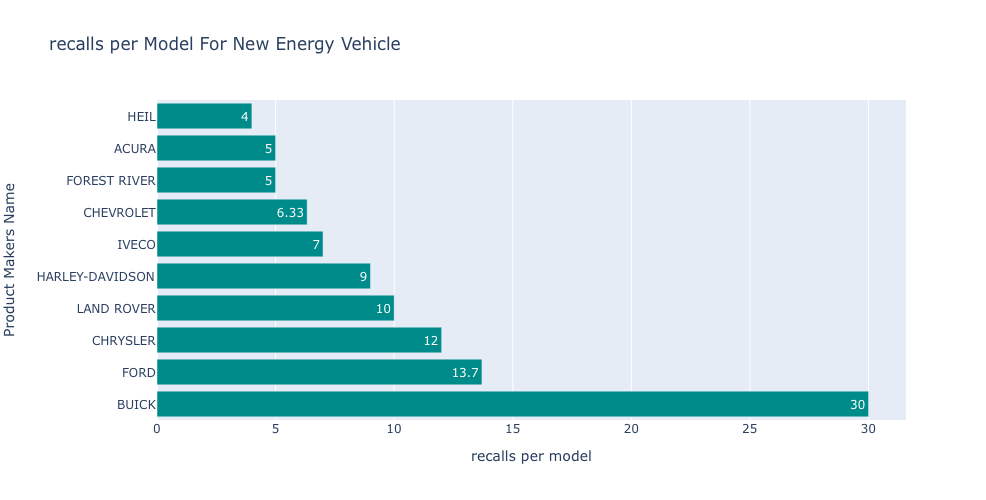

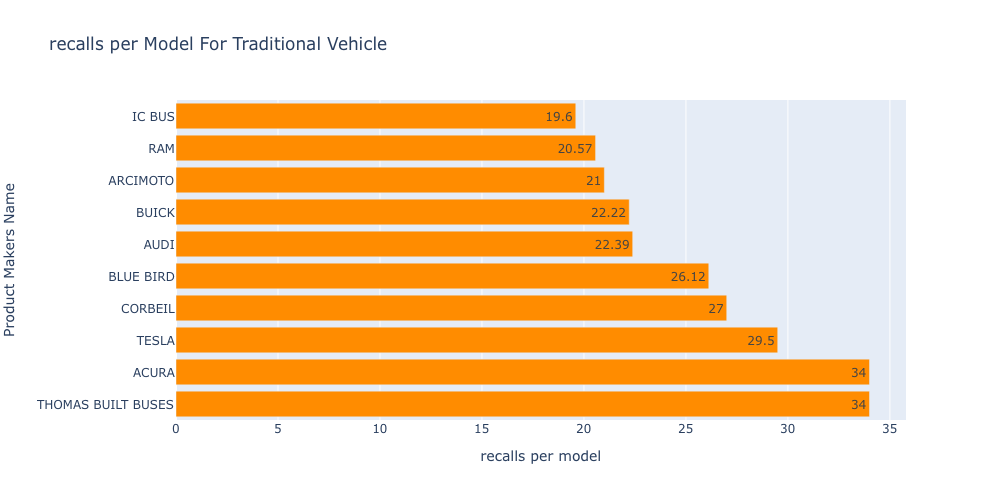

In [208]:
top_10 = compalint_ratio_NEV_round.head(10)
fig = px.bar(top_10, x=top_10['recall_ratio'], y=top_10.index,
             #pattern_shape=make_recalls_count['Make'],
             color_discrete_sequence=["darkcyan"],
             text_auto='',
             title="recalls per Model For New Energy Vehicle",
             labels=({"recall_ratio": "recalls per model","Make":"Product Makers Name"}),
             height=500)
fig.show()

top_10 = compalint_ratio_TV_round.head(10)
fig = px.bar(top_10, x=top_10['recall_ratio'], y=top_10.index,
             #pattern_shape=make_recalls_count['Make'],
             color_discrete_sequence=["darkorange"],
             text_auto='',
             title="recalls per Model For Traditional Vehicle",
             labels=({"recall_ratio": "recalls per model","Make":"Product Makers Name"}),
             height=500)
fig.show()

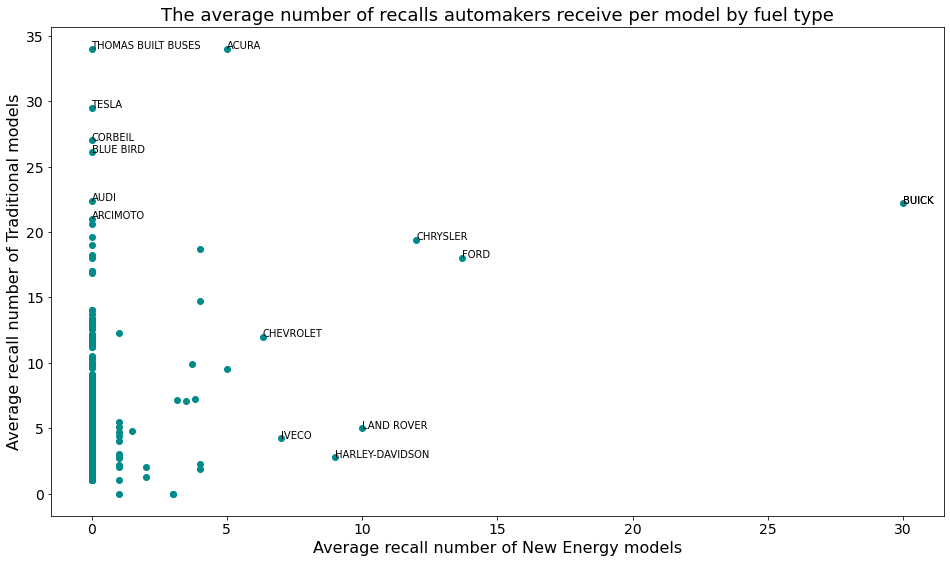

In [209]:
All_recall_ratio = pd.concat([compalint_ratio_NEV_round['recall_ratio'].rename('New_Energy'),
                                 compalint_ratio_TV_round['recall_ratio'].rename('Traditional')],
                                axis=1)\
                        .fillna(0)

fig, ax = plt.subplots(figsize=(16, 9))

# Draw scatter plot
plt.scatter(data=All_recall_ratio, x='New_Energy', y='Traditional',c='darkcyan')

# Label each node
All_recall_ratio.sort_values(by=['New_Energy','Traditional'],ascending=False,inplace=True)
for i, txt in enumerate(All_recall_ratio.head(7).index):
    ax.annotate(txt, (All_recall_ratio['New_Energy'][i], All_recall_ratio['Traditional'][i]))
All_recall_ratio.sort_values(by='Traditional',ascending=False,inplace=True)
for i, txt in enumerate(All_recall_ratio.head(8).index):
    ax.annotate(txt, (All_recall_ratio['New_Energy'][i], All_recall_ratio['Traditional'][i]))
    
# ax.annotate('CHEVROLET', (126,518))
# ax.annotate('AUDI', (6,410))
# ax.annotate('BMW', (5,148))
# ax.annotate('LINCOIN', (6,805))
# ax.annotate('MAZDA',(6,570))
# ax.annotate('LEXUS', (-18,465))


plt.title("The average number of recalls automakers receive per model by fuel type",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Average recall number of New Energy models", fontsize=16)
plt.ylabel("Average recall number of Traditional models", fontsize=16)

plt.show()

# Save as png image
fig.savefig('./Outputs/recall_ratio_per_model_by_makes_by_fuel_type.png', format='png')